# raw image path csv

In [ ]:
import os
import csv

def create_csv(image_folder, csv_file_path):
    # CSV header
    fieldnames = ['HospitalID', 'PatientID', 'ImageID', 'ImagePath', 'Label']
    
    # open the CSV file in write mode
    with open(csv_file_path, 'w', newline='') as csvfile:
        # Create a CSV writer object and write the header
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for filename in sorted(os.listdir(image_folder)):
            # complete image file path
            image_path = os.path.join(image_folder, filename)

            # filename to extract HospitalID, PatientID, image number, and image label
            parts = filename.split('_')
            hospital_id = parts[3]
            patient_id = parts[1]
            image_number = parts[6]
            image_label = parts[4]

            # write data into the CSV file
            writer.writerow({
                'HospitalID': hospital_id,
                'PatientID': patient_id,
                'ImageID': image_number,
                'ImagePath': image_path,
                'Label': image_label
            })

    # created and saved
    print("CSV file has been created and saved to:", csv_file_path)


image_folder = "/local/data1/honzh073/data/8bit_raw"
csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/raw_image.csv"
create_csv(image_folder, csv_file_path)


# hospitals csv files

In [ ]:
import csv
from collections import defaultdict
import os

def group_and_save_hospital_data(input_csv_path, output_folder):
    hospital_data = defaultdict(list)

    with open(input_csv_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            hospital_id = row['HospitalID']
            patient_id = row['PatientID']
            hospital_data[hospital_id].append(row)

    # Save grouped hospital data into individual CSV files
    for hospital_id, data in hospital_data.items():
        output_file_path = os.path.join(output_folder, f'hospital{hospital_id}.csv')
        with open(output_file_path, 'w', newline='') as csvfile:
            fieldnames = data[0].keys()
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(data)


# Input and output paths
input_csv_path = '/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/raw_image.csv'
output_folder = '/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles'

# Group and save hospital data
group_and_save_hospital_data(input_csv_path, output_folder)

print("Grouped and saved hospital data into individual CSV files.")



# hospital image folder

In [35]:
import pandas as pd
import shutil
import os

# Path to the CSV file containing image paths
csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/hospital55.csv"

# Destination folder to copy images
destination_folder = "/local/data1/honzh073/data/hospital55"

# Read image paths from the CSV file using pandas
data = pd.read_csv(csv_file_path)

# Iterate through rows and copy images to the destination folder
for index, row in data.iterrows():
    image_path = row["ImagePath"]  # Assuming this column contains the file paths to the images
    
    # Check if the source image file exists
    if os.path.exists(image_path):
        # Extract the image file name from the path
        image_filename = os.path.basename(image_path)
        
        # Construct the destination path by joining the destination folder and the image file name
        destination_path = os.path.join(destination_folder, image_filename)
        
        # Copy the image file to the destination folder
        shutil.copy(image_path, destination_path)

print("Image copying completed.")


Image copying completed.


# hospital 1 - 67 pixel density (Hospital 40 is missing)

In [ ]:
# import csv
# import os
# import pandas as pd
# import SimpleITK as sitk
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Read CSV files and plot pixel density
# csv_folder = '/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles'  # Path to the folder containing hospital CSV files

# # Get a list of CSV files in the folder
# csv_files = [os.path.join(csv_folder, file) for file in os.listdir(csv_folder) if file.endswith('.csv')]

# # Define colors for plotting (suitable for scientific papers)
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# # Create a single set of axes
# fig, ax = plt.subplots(figsize=(15, 6))

# # Plot pixel density for each hospital in the same plot
# for idx, csv_file_path in enumerate(csv_files):
#     data = pd.read_csv(csv_file_path)
#     pixel_densities = []

#     for index, row in data.iterrows():
#         image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
#         # Read the image
#         image = sitk.ReadImage(image_path)
#         image_array = sitk.GetArrayFromImage(image)
#         # Calculate pixel density (average pixel value) and add it to the list
#         pixel_density = image_array.mean()
#         pixel_densities.append(pixel_density)

#     color_idx = idx % len(colors)  # Ensure color index is within the range of available colors
#     sns.kdeplot(pixel_densities, label=f'Hospital {idx + 1}', fill=True, color=colors[color_idx], ax=ax)

# ax.set_xlabel('Pixel Density')
# ax.set_ylabel('Kernel Density')
# ax.set_title('Pixel Density Distribution - All Hospitals')
# ax.legend()

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()


# hospital 18 43 55

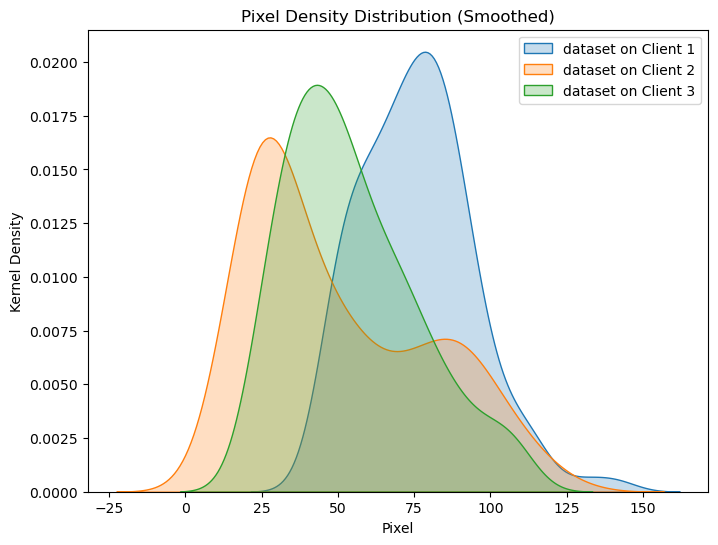

In [1]:
import pandas as pd
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt

# CSV file paths
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/hospital18.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/hospital43.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/hospital55.csv",
]

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Plot kernel density for each hospital
for idx, csv_file_path in enumerate(csv_file_paths):
    data = pd.read_csv(csv_file_path)
    pixel_densities = []

    for index, row in data.iterrows():
        image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
        # Read the image
        image = sitk.ReadImage(image_path)
        image_array = sitk.GetArrayFromImage(image)
        # Calculate pixel density (average pixel value) and add it to the list
        pixel_density = image_array.mean()
        pixel_densities.append(pixel_density)

    # Plot kernel density with fill=True (deprecated shade argument)
    sns.kdeplot(pixel_densities, label=f'dataset on Client {idx+1}', fill=True, color=colors[idx])

plt.xlabel('Pixel')
plt.ylabel('Kernel Density')
plt.title('Pixel Density Distribution (Smoothed)')
plt.legend()
plt.show()


# first order statistics

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


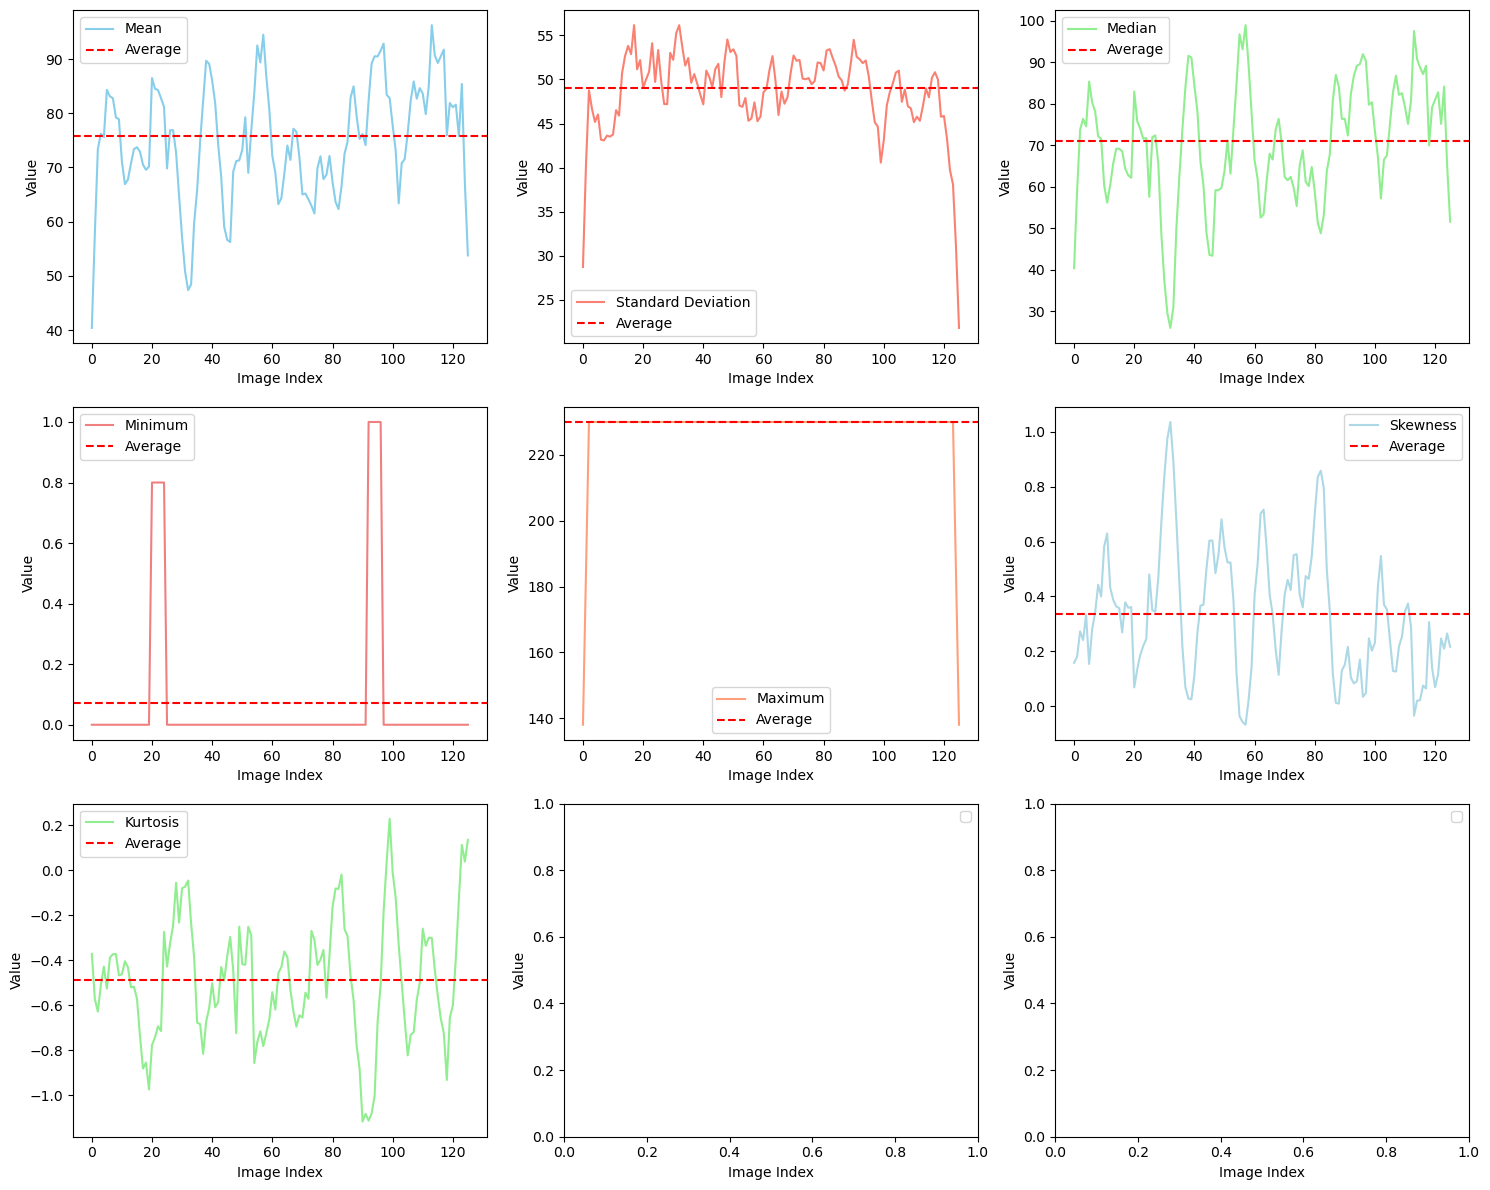

In [31]:
import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# CSV file paths
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/hospital18.csv",
]

# Function to calculate first-order statistics
def calculate_first_order_statistics(image_path):
    # Read the image using SimpleITK
    image = sitk.ReadImage(image_path)
    image_array = sitk.GetArrayFromImage(image)
    
    # Calculate first-order statistics (mean, std, min, max, median, skewness, kurtosis)
    mean_value = np.mean(image_array)
    std_value = np.std(image_array)
    min_value = np.min(image_array)
    max_value = np.max(image_array)
    median_value = np.median(image_array)
    skewness_value = skew(image_array.flatten())
    kurtosis_value = kurtosis(image_array.flatten())
    
    return mean_value, std_value, min_value, max_value, median_value, skewness_value, kurtosis_value

# Lists to store calculated statistics
mean_values = []
std_values = []
min_values = []
max_values = []
median_values = []
skewness_values = []
kurtosis_values = []

# Analyze first-order statistics for images in the CSV files
for csv_file_path in csv_file_paths:
    data = pd.read_csv(csv_file_path)
    for index, row in data.iterrows():
        image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
        
        # Calculate first-order statistics for the current image
        mean_value, std_value, min_value, max_value, median_value, skewness_value, kurtosis_value = calculate_first_order_statistics(image_path)
        
        # Store the calculated statistics in lists
        mean_values.append(mean_value)
        std_values.append(std_value)
        min_values.append(min_value)
        max_values.append(max_value)
        median_values.append(median_value)
        skewness_values.append(skewness_value)
        kurtosis_values.append(kurtosis_value)
        
        # Print or use the calculated statistics as needed
        # print(f"Statistics for {image_path}:")
        # print(f"Mean: {mean_value}")
        # print(f"Standard Deviation: {std_value}")
        # print(f"Minimum Pixel Value: {min_value}")
        # print(f"Maximum Pixel Value: {max_value}")
        # print(f"Median Pixel Value: {median_value}")
        # print(f"Skewness: {skewness_value}")
        # print(f"Kurtosis: {kurtosis_value}")
        # print("-" * 50)

import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# ... (same code for reading CSV and calculating statistics)

# Calculate Averages for each set of statistics
mean_mean_value = np.mean(mean_values)
mean_std_value = np.mean(std_values)
mean_min_value = np.mean(min_values)
mean_max_value = np.mean(max_values)
mean_median_value = np.mean(median_values)
mean_skewness_value = np.mean(skewness_values)
mean_kurtosis_value = np.mean(kurtosis_values)

# Apply moving averages to smooth the plotted values
window_size = 5  # You can adjust this value for more or less smoothing
mean_values_smoothed = np.convolve(mean_values, np.ones(window_size)/window_size, mode='same')
std_values_smoothed = np.convolve(std_values, np.ones(window_size)/window_size, mode='same')
min_values_smoothed = np.convolve(min_values, np.ones(window_size)/window_size, mode='same')
max_values_smoothed = np.convolve(max_values, np.ones(window_size)/window_size, mode='same')
median_values_smoothed = np.convolve(median_values, np.ones(window_size)/window_size, mode='same')
skewness_values_smoothed = np.convolve(skewness_values, np.ones(window_size)/window_size, mode='same')
kurtosis_values_smoothed = np.convolve(kurtosis_values, np.ones(window_size)/window_size, mode='same')

# Plot the smoothed statistics as curves with Average lines
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes[0, 0].plot(mean_values_smoothed, color='skyblue', label='Mean')
axes[0, 0].axhline(y=mean_mean_value, color='r', linestyle='--', label='Average')
axes[0, 1].plot(std_values_smoothed, color='salmon', label='Standard Deviation')
axes[0, 1].axhline(y=mean_std_value, color='r', linestyle='--', label='Average')
axes[0, 2].plot(median_values_smoothed, color='lightgreen', label='Median')
axes[0, 2].axhline(y=mean_median_value, color='r', linestyle='--', label='Average')
axes[1, 0].plot(min_values_smoothed, color='lightcoral', label='Minimum')
axes[1, 0].axhline(y=mean_min_value, color='r', linestyle='--', label='Average')
axes[1, 1].plot(max_values_smoothed, color='lightsalmon', label='Maximum')
axes[1, 1].axhline(y=mean_max_value, color='r', linestyle='--', label='Average')
axes[1, 2].plot(skewness_values_smoothed, color='lightblue', label='Skewness')
axes[1, 2].axhline(y=mean_skewness_value, color='r', linestyle='--', label='Average')
axes[2, 0].plot(kurtosis_values_smoothed, color='lightgreen', label='Kurtosis')
axes[2, 0].axhline(y=mean_kurtosis_value, color='r', linestyle='--', label='Average')

for ax in axes.flat:
    ax.set_xlabel('Image Index')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()


OSError: Parameter file /path/to/your/RadiomicsParams.yaml does not exist.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


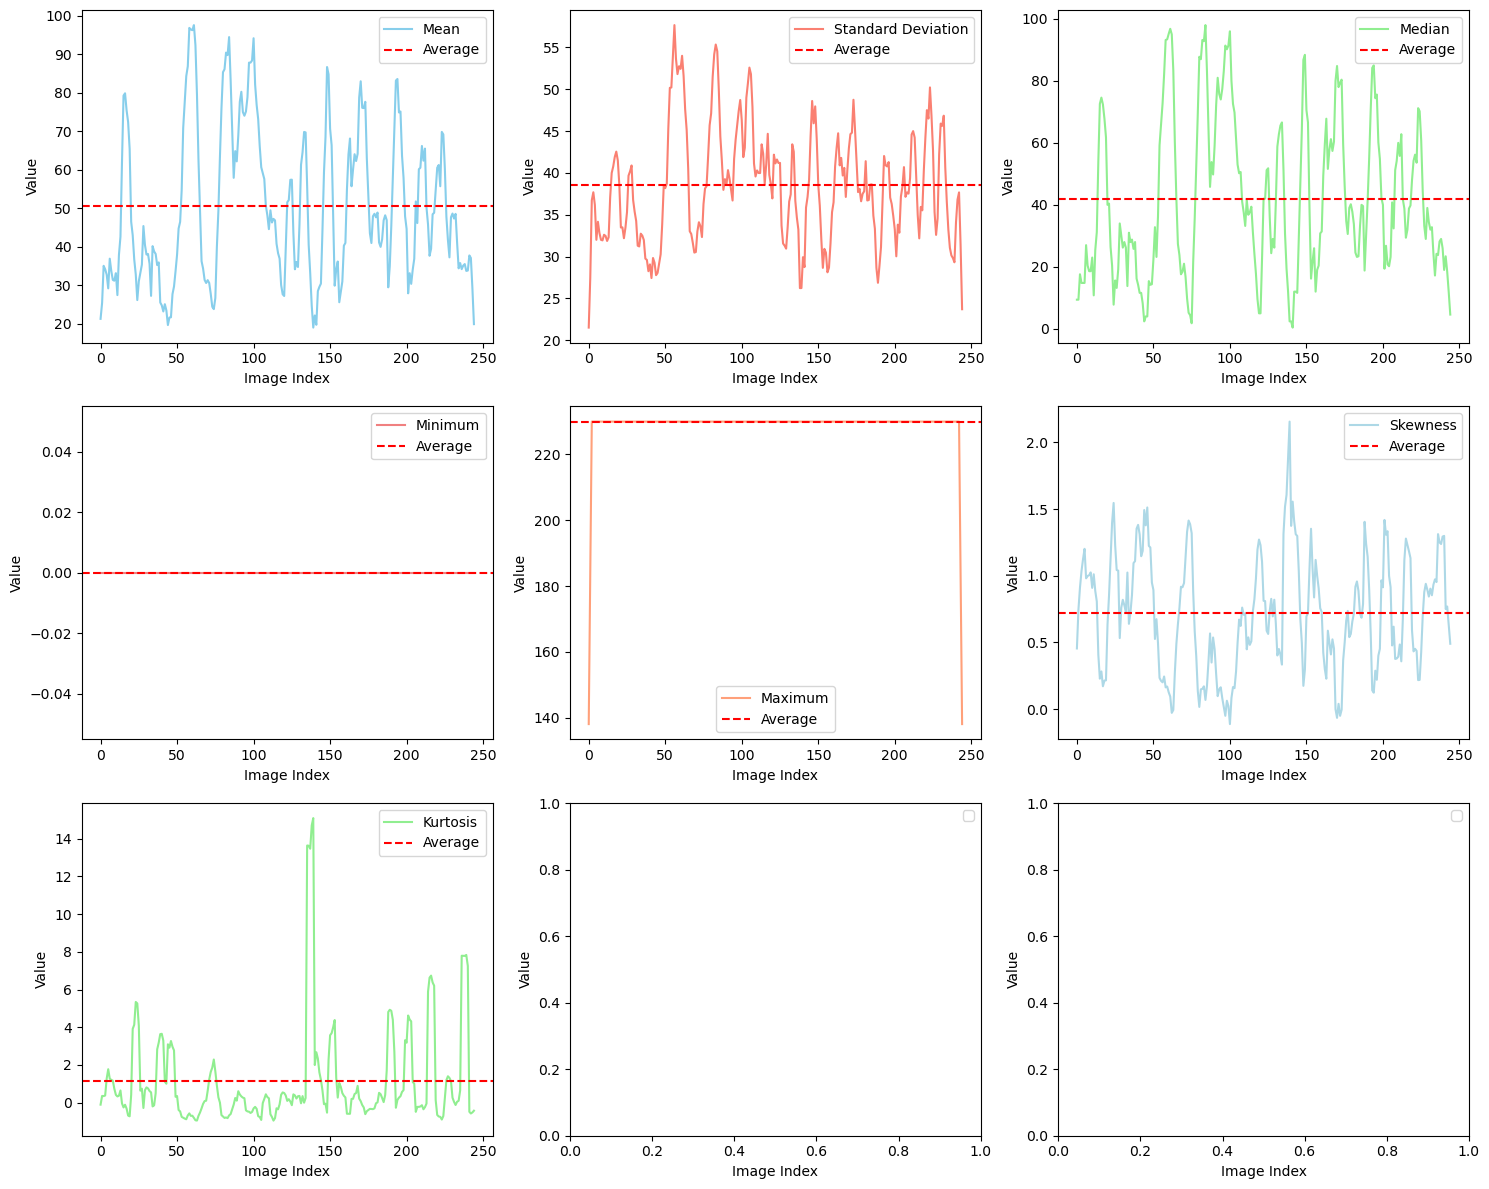

In [5]:
import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# CSV file paths
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/hospital43.csv",
]

# Function to calculate first-order statistics
def calculate_first_order_statistics(image_path):
    # Read the image using SimpleITK
    image = sitk.ReadImage(image_path)
    image_array = sitk.GetArrayFromImage(image)
    
    # Calculate first-order statistics (mean, std, min, max, median, skewness, kurtosis)
    mean_value = np.mean(image_array)
    std_value = np.std(image_array)
    min_value = np.min(image_array)
    max_value = np.max(image_array)
    median_value = np.median(image_array)
    skewness_value = skew(image_array.flatten())
    kurtosis_value = kurtosis(image_array.flatten())
    
    return mean_value, std_value, min_value, max_value, median_value, skewness_value, kurtosis_value

# Lists to store calculated statistics
mean_values = []
std_values = []
min_values = []
max_values = []
median_values = []
skewness_values = []
kurtosis_values = []

# Analyze first-order statistics for images in the CSV files
for csv_file_path in csv_file_paths:
    data = pd.read_csv(csv_file_path)
    for index, row in data.iterrows():
        image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
        
        # Calculate first-order statistics for the current image
        mean_value, std_value, min_value, max_value, median_value, skewness_value, kurtosis_value = calculate_first_order_statistics(image_path)
        
        # Store the calculated statistics in lists
        mean_values.append(mean_value)
        std_values.append(std_value)
        min_values.append(min_value)
        max_values.append(max_value)
        median_values.append(median_value)
        skewness_values.append(skewness_value)
        kurtosis_values.append(kurtosis_value)
        
        # Print or use the calculated statistics as needed
        # print(f"Statistics for {image_path}:")
        # print(f"Mean: {mean_value}")
        # print(f"Standard Deviation: {std_value}")
        # print(f"Minimum Pixel Value: {min_value}")
        # print(f"Maximum Pixel Value: {max_value}")
        # print(f"Median Pixel Value: {median_value}")
        # print(f"Skewness: {skewness_value}")
        # print(f"Kurtosis: {kurtosis_value}")
        # print("-" * 50)

import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# ... (same code for reading CSV and calculating statistics)

# Calculate Averages for each set of statistics
mean_mean_value = np.mean(mean_values)
mean_std_value = np.mean(std_values)
mean_min_value = np.mean(min_values)
mean_max_value = np.mean(max_values)
mean_median_value = np.mean(median_values)
mean_skewness_value = np.mean(skewness_values)
mean_kurtosis_value = np.mean(kurtosis_values)

# Apply moving averages to smooth the plotted values
window_size = 5  # You can adjust this value for more or less smoothing
mean_values_smoothed = np.convolve(mean_values, np.ones(window_size)/window_size, mode='same')
std_values_smoothed = np.convolve(std_values, np.ones(window_size)/window_size, mode='same')
min_values_smoothed = np.convolve(min_values, np.ones(window_size)/window_size, mode='same')
max_values_smoothed = np.convolve(max_values, np.ones(window_size)/window_size, mode='same')
median_values_smoothed = np.convolve(median_values, np.ones(window_size)/window_size, mode='same')
skewness_values_smoothed = np.convolve(skewness_values, np.ones(window_size)/window_size, mode='same')
kurtosis_values_smoothed = np.convolve(kurtosis_values, np.ones(window_size)/window_size, mode='same')

# Plot the smoothed statistics as curves with Average lines
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes[0, 0].plot(mean_values_smoothed, color='skyblue', label='Mean')
axes[0, 0].axhline(y=mean_mean_value, color='r', linestyle='--', label='Average')
axes[0, 1].plot(std_values_smoothed, color='salmon', label='Standard Deviation')
axes[0, 1].axhline(y=mean_std_value, color='r', linestyle='--', label='Average')
axes[0, 2].plot(median_values_smoothed, color='lightgreen', label='Median')
axes[0, 2].axhline(y=mean_median_value, color='r', linestyle='--', label='Average')
axes[1, 0].plot(min_values_smoothed, color='lightcoral', label='Minimum')
axes[1, 0].axhline(y=mean_min_value, color='r', linestyle='--', label='Average')
axes[1, 1].plot(max_values_smoothed, color='lightsalmon', label='Maximum')
axes[1, 1].axhline(y=mean_max_value, color='r', linestyle='--', label='Average')
axes[1, 2].plot(skewness_values_smoothed, color='lightblue', label='Skewness')
axes[1, 2].axhline(y=mean_skewness_value, color='r', linestyle='--', label='Average')
axes[2, 0].plot(kurtosis_values_smoothed, color='lightgreen', label='Kurtosis')
axes[2, 0].axhline(y=mean_kurtosis_value, color='r', linestyle='--', label='Average')

for ax in axes.flat:
    ax.set_xlabel('Image Index')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


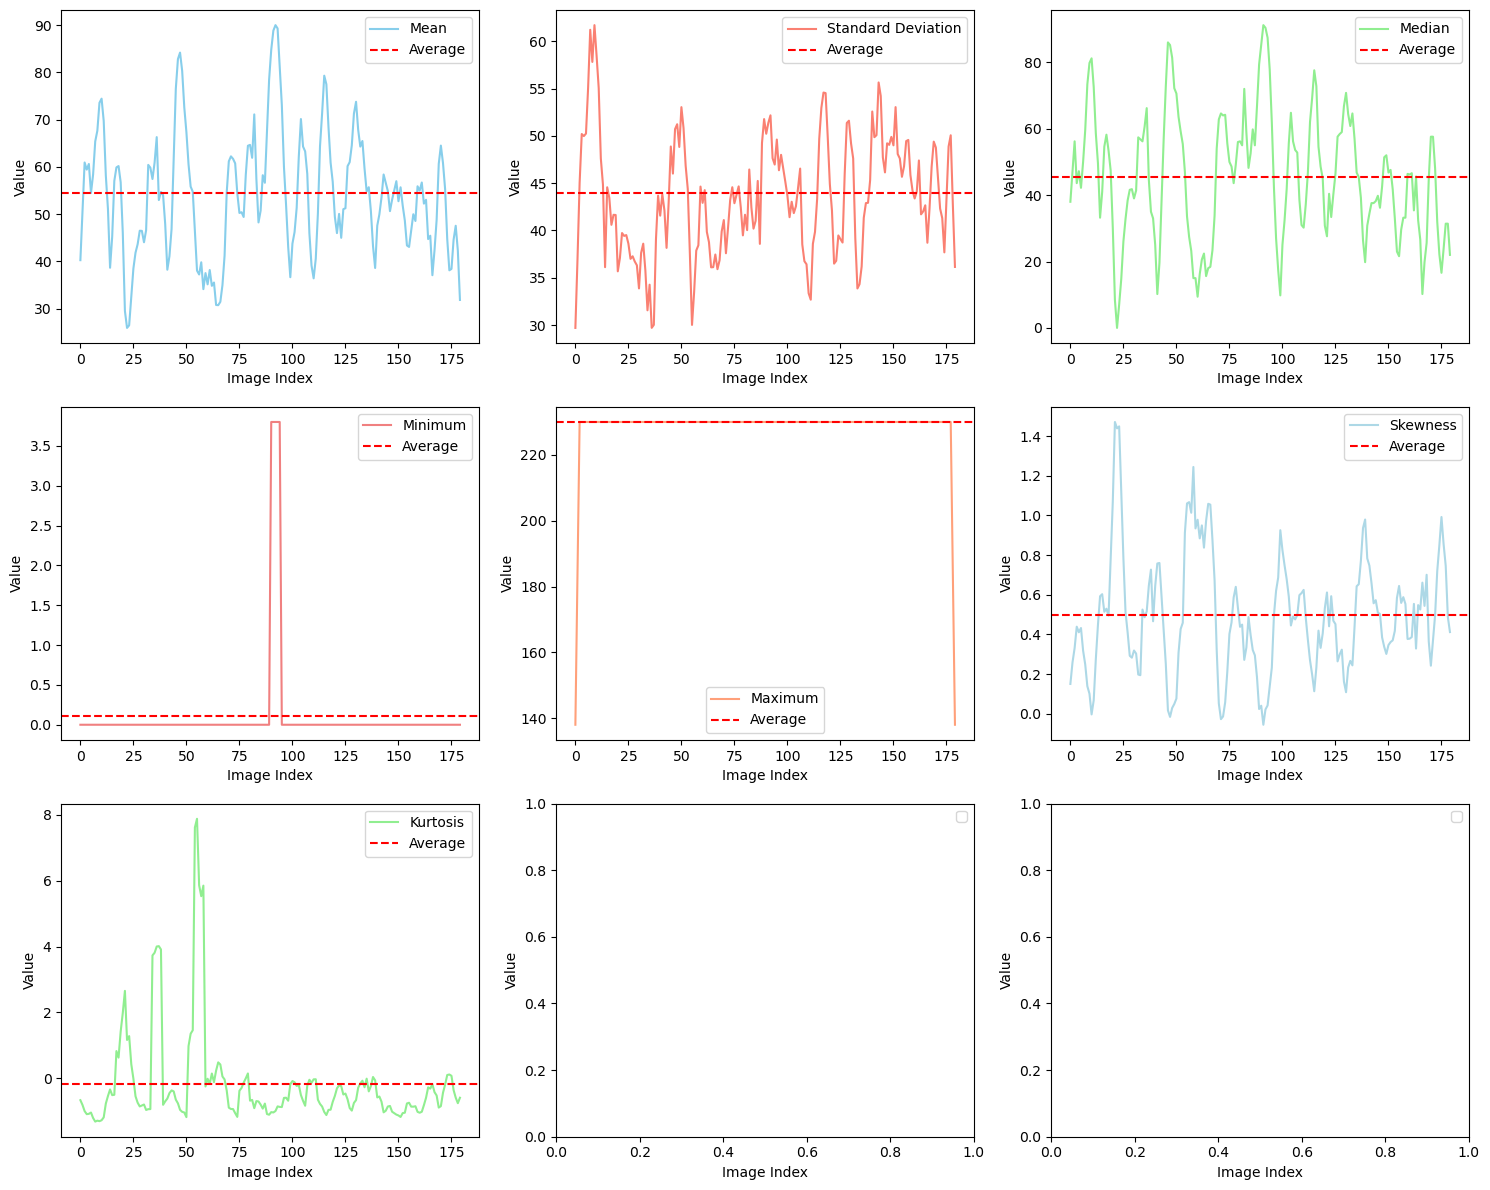

In [6]:
import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# CSV file paths
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/hospital55.csv",
]

# Function to calculate first-order statistics
def calculate_first_order_statistics(image_path):
    # Read the image using SimpleITK
    image = sitk.ReadImage(image_path)
    image_array = sitk.GetArrayFromImage(image)
    
    # Calculate first-order statistics (mean, std, min, max, median, skewness, kurtosis)
    mean_value = np.mean(image_array)
    std_value = np.std(image_array)
    min_value = np.min(image_array)
    max_value = np.max(image_array)
    median_value = np.median(image_array)
    skewness_value = skew(image_array.flatten())
    kurtosis_value = kurtosis(image_array.flatten())
    
    return mean_value, std_value, min_value, max_value, median_value, skewness_value, kurtosis_value

# Lists to store calculated statistics
mean_values = []
std_values = []
min_values = []
max_values = []
median_values = []
skewness_values = []
kurtosis_values = []

# Analyze first-order statistics for images in the CSV files
for csv_file_path in csv_file_paths:
    data = pd.read_csv(csv_file_path)
    for index, row in data.iterrows():
        image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
        
        # Calculate first-order statistics for the current image
        mean_value, std_value, min_value, max_value, median_value, skewness_value, kurtosis_value = calculate_first_order_statistics(image_path)
        
        # Store the calculated statistics in lists
        mean_values.append(mean_value)
        std_values.append(std_value)
        min_values.append(min_value)
        max_values.append(max_value)
        median_values.append(median_value)
        skewness_values.append(skewness_value)
        kurtosis_values.append(kurtosis_value)
        
        # Print or use the calculated statistics as needed
        # print(f"Statistics for {image_path}:")
        # print(f"Mean: {mean_value}")
        # print(f"Standard Deviation: {std_value}")
        # print(f"Minimum Pixel Value: {min_value}")
        # print(f"Maximum Pixel Value: {max_value}")
        # print(f"Median Pixel Value: {median_value}")
        # print(f"Skewness: {skewness_value}")
        # print(f"Kurtosis: {kurtosis_value}")
        # print("-" * 50)

# Calculate Averages for each set of statistics
mean_mean_value = np.mean(mean_values)
mean_std_value = np.mean(std_values)
mean_min_value = np.mean(min_values)
mean_max_value = np.mean(max_values)
mean_median_value = np.mean(median_values)
mean_skewness_value = np.mean(skewness_values)
mean_kurtosis_value = np.mean(kurtosis_values)

# Apply moving averages to smooth the plotted values
window_size = 5  # You can adjust this value for more or less smoothing
mean_values_smoothed = np.convolve(mean_values, np.ones(window_size)/window_size, mode='same')
std_values_smoothed = np.convolve(std_values, np.ones(window_size)/window_size, mode='same')
min_values_smoothed = np.convolve(min_values, np.ones(window_size)/window_size, mode='same')
max_values_smoothed = np.convolve(max_values, np.ones(window_size)/window_size, mode='same')
median_values_smoothed = np.convolve(median_values, np.ones(window_size)/window_size, mode='same')
skewness_values_smoothed = np.convolve(skewness_values, np.ones(window_size)/window_size, mode='same')
kurtosis_values_smoothed = np.convolve(kurtosis_values, np.ones(window_size)/window_size, mode='same')

# Plot the smoothed statistics as curves with Average lines
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes[0, 0].plot(mean_values_smoothed, color='skyblue', label='Mean')
axes[0, 0].axhline(y=mean_mean_value, color='r', linestyle='--', label='Average')
axes[0, 1].plot(std_values_smoothed, color='salmon', label='Standard Deviation')
axes[0, 1].axhline(y=mean_std_value, color='r', linestyle='--', label='Average')
axes[0, 2].plot(median_values_smoothed, color='lightgreen', label='Median')
axes[0, 2].axhline(y=mean_median_value, color='r', linestyle='--', label='Average')
axes[1, 0].plot(min_values_smoothed, color='lightcoral', label='Minimum')
axes[1, 0].axhline(y=mean_min_value, color='r', linestyle='--', label='Average')
axes[1, 1].plot(max_values_smoothed, color='lightsalmon', label='Maximum')
axes[1, 1].axhline(y=mean_max_value, color='r', linestyle='--', label='Average')
axes[1, 2].plot(skewness_values_smoothed, color='lightblue', label='Skewness')
axes[1, 2].axhline(y=mean_skewness_value, color='r', linestyle='--', label='Average')
axes[2, 0].plot(kurtosis_values_smoothed, color='lightgreen', label='Kurtosis')
axes[2, 0].axhline(y=mean_kurtosis_value, color='r', linestyle='--', label='Average')

for ax in axes.flat:
    ax.set_xlabel('Image Index')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()


In [36]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital43"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospital43_features.csv', index=False)


In [ ]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital55"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospital55_features.csv', index=False)
